시각화에 사용할 모든 데이터는 ./data 폴더 내부에 위치시켜주세요

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ROOT = 'data/'
import load_data as ld
import visualization as vis 

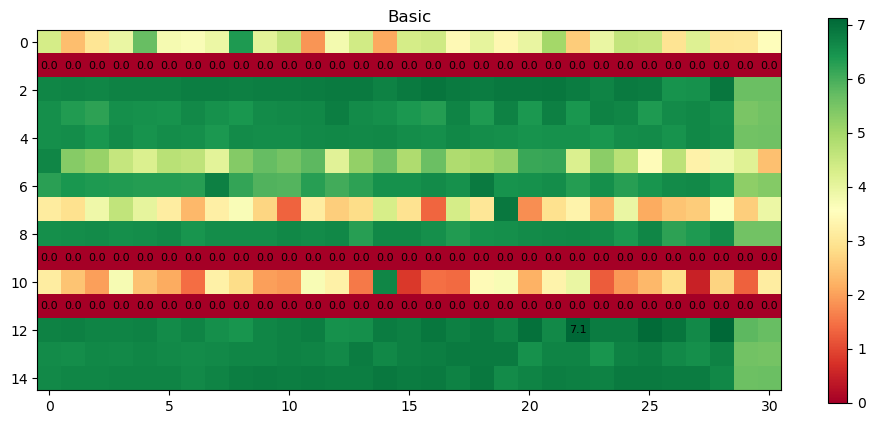

In [3]:
path = ROOT + "240315-122454_videopath_JK_rewardmethod_10_importantmethod_021_threshold_0.3.npy"

data = ld.load_ndarray(path)
vis.plot_heatmap(data, name="Basic", show_minmax=True)

In [4]:
path = ROOT + "240318-143312_videopath_JK_rewardmethod_10_importantmethod_021_threshold_0.3_epsdec_0.005.npy"

data = ld.load_ndarray(path)
vis.plot_heatmap(data, "slow episilon decay", show_minmax=True)

NameError: name 'load_ndarray' is not defined